<a href="https://colab.research.google.com/github/Karishma-Kuria/DL-FasiAI/blob/main/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab contains Image classification, Image Segmentation, Text Classifier for sentiment analysis, Tabular learner, Collab learner for Recommendation.

### Installing the Libraries

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 56.6 MB/s 
     |████████████████████████████████| 1.2 MB 47.2 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 361 kB/s 
Mounted at /content/gdrive


## **Image Classification using cnn_learner**

### Importing the dataset. The dataset contains 7,349 images of cats and dogs from 37 different breeds.
### Here a pretrained model is used and then finetuned.

In [5]:
from fastbook import *
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'


In [6]:
# function categorizing the image as cat
def isCat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct= 0.2,
                                      seed = 42, 
                                      label_func= isCat, item_tfms = Resize(224))
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(1)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.181384,0.021705,0.008119,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.054905,0.012243,0.003383,01:01


In [12]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

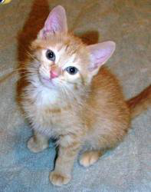

In [22]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [23]:
isCat,_,probs = learn.predict(img)
print(f"Is this a cat?: {isCat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## **Segmentation using unet_learner**

In [24]:
# code for image segmentation using Segmentation Data Loader
image_path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(image_path/"images"),
    label_func = lambda o: image_path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(image_path/'codes.txt', dtype=str)
  )
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.055101,2.836826,00:02


epoch,train_loss,valid_loss,time
0,1.821470,1.626738,00:02
1,1.586452,1.296059,00:02
2,1.438573,1.235905,00:02
3,1.322140,1.280745,00:02
4,1.241591,0.999410,00:03
5,1.141555,0.919186,00:02
6,1.050918,0.837463,00:04
7,0.978905,0.827912,00:03


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


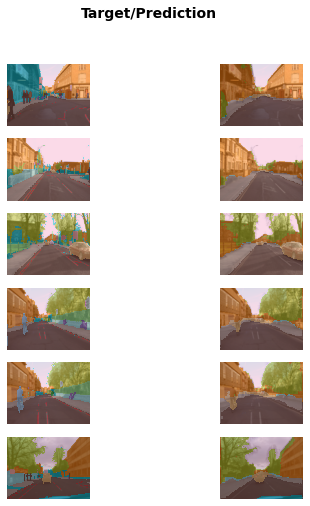

In [25]:
learn.show_results(max_n = 6, figsize=(7,8))

Each component in the image is segmented into classes as shown in the above diagram.

# **Text Classification Learner for Sentiment Analysis**

In [26]:
from fastai.text.all import *

# text classifier using Text Data loader for sentiment analysis
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid = 'test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult = 0.5, metrics = accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463724,0.403414,0.819680,03:28


epoch,train_loss,valid_loss,accuracy,time
0,0.305729,0.243176,0.902440,07:03
1,0.241202,0.204163,0.922560,07:05
2,0.181769,0.199049,0.923360,07:05
3,0.142545,0.189642,0.931040,07:05


In [27]:
# testing the pidiction
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([2.1410e-04, 9.9979e-01]))

# **Tabular Learner**

In [30]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


In the above code we have told Fastai which columns are categorical(such as occupation) and which are continuous (such as age).

In [32]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376967,0.369468,0.830467,00:07
1,0.358921,0.362004,0.824478,00:04
2,0.355168,0.355466,0.833077,00:04


# **Recommendation**

Using Collab_Learner

This model predicts the movie ratings on a scale of 0.5 to 5.0 with an average error of 0.6. 

In [33]:
from fastai.collab import *
# it uses collab data loader 
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range = (0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.524478,1.375450,00:00


epoch,train_loss,valid_loss,time
0,1.371101,1.317147,00:00
1,1.279592,1.139263,00:00
2,1.031932,0.842553,00:00
3,0.811764,0.692590,00:00
4,0.700879,0.654806,00:00
5,0.652622,0.642204,00:00
6,0.637581,0.636470,00:00
7,0.620107,0.633971,00:00
8,0.609015,0.633137,00:00
9,0.602425,0.633016,00:00


In [34]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,60.0,7.0,5.0,4.690999
1,41.0,44.0,4.0,3.198417
2,32.0,71.0,5.0,4.634473
3,86.0,41.0,4.5,4.121322
4,9.0,74.0,2.0,3.244607
5,16.0,79.0,4.0,3.965909
6,8.0,22.0,5.0,3.858890
7,8.0,77.0,4.5,4.539055
8,66.0,35.0,4.0,3.947524
